## EE-361M Introduction to Data Mining
## Assignment #3
## Due: Thursday, Mar 4, 2016 by midnight; Total points: 50


Your homework should be written in a **Jupyter notebook** (if this isn't possible, let me know). Please use this naming format for your notebook you submit: **Group(Group Num)_HW(HW Number).ipynb**. For example, Group1_HW1.ipynb. Homeworks should be submitted through Canvas in your **groups of 3 from the first homework**. If groups need to be adjusted please contact the TA. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

## Question 1 (2+1 = 3 points)

View the video at:

https://www.youtube.com/watch?v=jbkSRLYSojo

(Hans Rosling's 200 Countries, 200 Years, 4 Minutes) and answer the following questions:

1. How many variables are being visualized in the “moving bubble plots” video (list them)?

2. Identify a variable that is “zoomed into”, i.e., examined at a sub-category or more detailed level.


FACTOID: Rosling’s gapminder visualization

(see https://www.youtube.com/user/Gapcast for some more insightful videos) can now be

readily used by you via Google Charts: https://developers.google.com/chart/interactive/docs/gallery

Just plug in your own variables into “Bubble Chart” under the URL above and go!

##### 1.1
Number of variables in the "moving bubble plots" visualization:

- year
    - countries
        - income per person (x)
        - life expectancy (y)
        - geographic region (bubble color)
        - country population (bubble size)
        - cities
            - income per person (x)
            - life expectancy (y)
            - geographic region (bubble size)
            - city population (bubble size)
            
    
1. x = country income per person
2. y = country life expectancy
3. bubble color = country region
4. bubble size = country population
5. t = year (time)
6. sub_bubble = city in country

##### 1.2
Variable that is zoomed into:

The country variable is "zoomed into" revealing its city sub categories, each with its own income per person, life expectancy, geographic region (same as its country), and population.

## Question 2 (3+3+2+2=10 points)

In this question, you will explore the application of Lasso and Ridge regression using sklearn package in Python. The dataset is prostate cancer data. The data can be found on canvas on the homework 3 page as prostate.csv. More information on the data can be found [here](https://cran.r-project.org/web/packages/ElemStatLearn/ElemStatLearn.pdf) under prostate. Use a random state of 42 and a test size of 1/3 to [split the data into training and test](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). We will be using all the variables to predict lcavol. 

1. Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter lambda (Note: lambda is called alpha in sklearn), use [0.00001, 0.0001,0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10, 100]  for ridge and [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5] for lasso. Report the best chosen based on cross-validation. The cross validation should happen on your training data using  average MSE as the scoring metric.
2. Run ridge and lasso for all of the parameters specified above (on all training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? 
3. Run least squares regression, ridge, and lasso on the full training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error on the test data for each.
4. For the best lasso parameter, determine the variables that were not dropped. Using only these variables, run least squares regression on full training data and report the prediction error on the test data.


In [176]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split as split

X = pd.read_csv("../data/prostate.csv", sep= ',')
y = X['lcavol'].values
del X['lcavol']
features = list(X.columns.values)
X = X.values

X_train, X_test, y_train, y_test = split(X, y, test_size = 0.33, random_state = 42)
alphas_lasso = np.array([0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5])
alphas_ridge = np.array([0.00001, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10, 100])

##### 2.1

In [177]:
import matplotlib.pyplot as plt
from sklearn import linear_model as model
from sklearn.cross_validation import KFold
from sklearn import metrics

alpha_errors = list()
lasso_MSE_list = list()
ridge_MSE_list = list()

kf = KFold(len(X_train), n_folds = 5)

for a in alphas_lasso:
    for train_index, test_index in kf:
        lasso_model = model.Lasso(alpha = a)
        lasso_model.fit(X_train[train_index], y_train[train_index])
        alpha_errors.append(metrics.mean_squared_error(y_train[test_index], lasso_model.predict(X_train[test_index])))
    lasso_MSE_list.append(np.mean(alpha_errors))
    del alpha_errors[:]
    
for a in alphas_ridge:
    for train_index, test_index in kf:
        ridge_model = model.Ridge(alpha = a)
        ridge_model.fit(X_train[train_index], y_train[train_index])
        alpha_errors.append(metrics.mean_squared_error(y_train[test_index], ridge_model.predict(X_train[test_index])))
    ridge_MSE_list.append(np.mean(alpha_errors))
    del alpha_errors[:]

In [178]:
print "{:<10} {:<10}".format('alpha', 'MSE score')
for j in range (len(alphas_lasso)):
    print '{0:<10f} {1:<10f}'.format(alphas_lasso[j], lasso_MSE_list[j])

alpha      MSE score 
0.000100   0.626430  
0.000500   0.624792  
0.001000   0.622776  
0.005000   0.608804  
0.010000   0.594429  
0.050000   0.562814  
0.100000   0.560123  
0.200000   0.582160  
0.300000   0.649289  
0.400000   0.758263  
0.500000   0.905151  


The best alpha and corresponding MSE score for lasso is 0.1 and 0.560123

In [179]:
print "{:<10} {:<10}".format('alpha', 'MSE score')
for j in range (len(alphas_lasso)):
    print '{0:<10f} {1:<10f}'.format(alphas_ridge[j], ridge_MSE_list[j])

alpha      MSE score 
0.000010   0.626840  
0.000100   0.626838  
0.001000   0.626817  
0.005000   0.626724  
0.010000   0.626609  
0.050000   0.625693  
0.100000   0.624570  
1.000000   0.607739  
5.000000   0.569529  
10.000000  0.552110  
100.000000 0.743537  


The best alpha and corresponding MSE score for ridge is 10 and 0.552110

##### 2.2
For the best lasso parameter, determine the variables that were not dropped. Using only these variables, run least squares regression on full training data and report the prediction error on the test data.

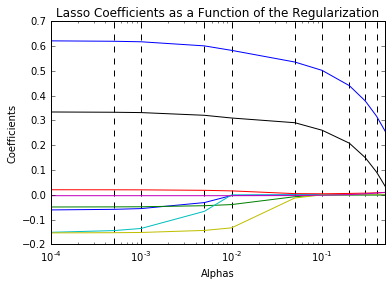

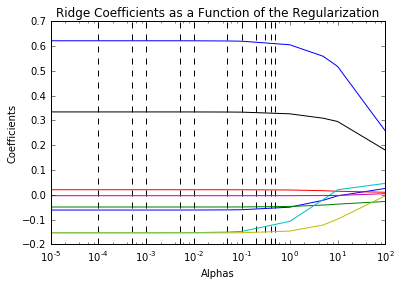

In [180]:
# Lasso Plot
lasso = model.Lasso(fit_intercept=False)

coefs = []
for a in alphas_lasso:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
ax1 = plt.gca()
ax1.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax1.plot(alphas_lasso, coefs)
ax1.set_xscale('log')
ymin, ymax = plt.ylim()
plt.vlines(alphas_lasso, ymin, ymax, linestyle='dashed')
plt.xlabel('Alphas')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients as a Function of the Regularization')
plt.axis('tight')
plt.show()

# Ridge Plot
ridge = model.Ridge(fit_intercept=False)

coefs = []
for a in alphas_ridge:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

ax2 = plt.gca()
ax2.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax2.plot(alphas_ridge, coefs)
ax2.set_xscale('log')
ymin, ymax = plt.ylim()
plt.vlines(alphas_lasso, ymin, ymax, linestyle='dashed')
plt.xlabel('Alphas')
plt.ylabel('Coefficients')
plt.title('Ridge Coefficients as a Function of the Regularization')
plt.axis('tight')
plt.show()

##### 2.3
Run least squares regression, ridge, and lasso on the full training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error on the test data for each.

In [181]:
# Least Squares Regression
lsr = model.LinearRegression()
lsr.fit(X_train, y_train)
lsr_error = metrics.mean_squared_error(y_test, lsr.predict(X_test))
print "For the least squares regression, the prediction error on the test data is %s" % (lsr_error)

# Ridge Regression
ridge = model.Ridge(alpha=10)
ridge.fit(X_train, y_train)
ridge_error = metrics.mean_squared_error(y_test, ridge.predict(X_test))
print "For the ridge regression, the prediction error on the test data is %s" % (ridge_error)

# Lasso Regression
lasso = model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_error = metrics.mean_squared_error(y_test, lasso.predict(X_test))
print "For the lasso regression, the prediction error on the test data is %s" % (lasso_error)

For the least squares regression, the prediction error on the test data is 0.543783938173
For the ridge regression, the prediction error on the test data is 0.544994235195
For the lasso regression, the prediction error on the test data is 0.564961986751


##### 2.4
For the best lasso parameter, determine the variables that were not dropped. Using only these variables, run least squares regression on full training data and report the prediction error on the test data.

In [182]:
variables = list()
dropped = list()
for coef, feature in zip(lasso.coef_, features):
    if coef != 0: variables.append(feature)
    else: dropped.append(feature)
print "The variables that were not dropped were: "
for variable in variables: print "- %s" % (variable)

X = pd.read_csv("../data/prostate.csv", sep= ',')
y = X['lcavol'].values
del X['lcavol']
for var in dropped:
    del X[var]
X = X.values
X_train, X_test, y_train, y_test = split(X, y, test_size = 0.33, random_state = 42)

lsr = model.LinearRegression()
lsr.fit(X_train, y_train)
error = metrics.mean_squared_error(y_test, lsr.predict(X_test))
print "Running a least squares regression on only the variables that weren't dropped for the best lasso parameter,"
print "the prediction error on the test data is: %s" % (error)

The variables that were not dropped were: 
- age
- lbph
- lcp
- pgg45
- lpsa
Running a least squares regression on only the variables that weren't dropped for the best lasso parameter,
the prediction error on the test data is: 0.541808479085


## Question 3 (3+3+2+2 = 10 points)

Re-solve all the questions in question 2 using R. You can submit the code and results via a PDF or other format. Just please make a reference to it in your notebook. See hints.R on the Canvas homework 3 page to help get you started. I would recommend using [RStudio](https://www.rstudio.com/products/rstudio/download/) for your work in R.

Attached as a PDF file.

## Question 4 (5+5 = 10 points)

1. Derive the coefficent updates, from first principles, for a gradient descent version of linear regression. Hint: start from the cost function. If you write the math by hand, submit that as a separate file and make a reference to it in your notebook or include the image in your notebook.
2. Write Python code for a gradient descent version of linear regression. Should be similar to sklearn in that you have a fit function that takes an X, y, learning rate, and number of iterations and a predict funtion that takes an X value. Use your new SGD regression to re-run question 2.4 and compare MSE. Make sure you always normalize your X matrices and use an intercept. You can also compare your results with SGDRegressor from sklearn, but not required.

##### 4.1
Derive the coefficent updates, from first principles, for a gradient descent version of linear regression. Hint: start from the cost function. If you write the math by hand, submit that as a separate file and make a reference to it in your notebook or include the image in your notebook.

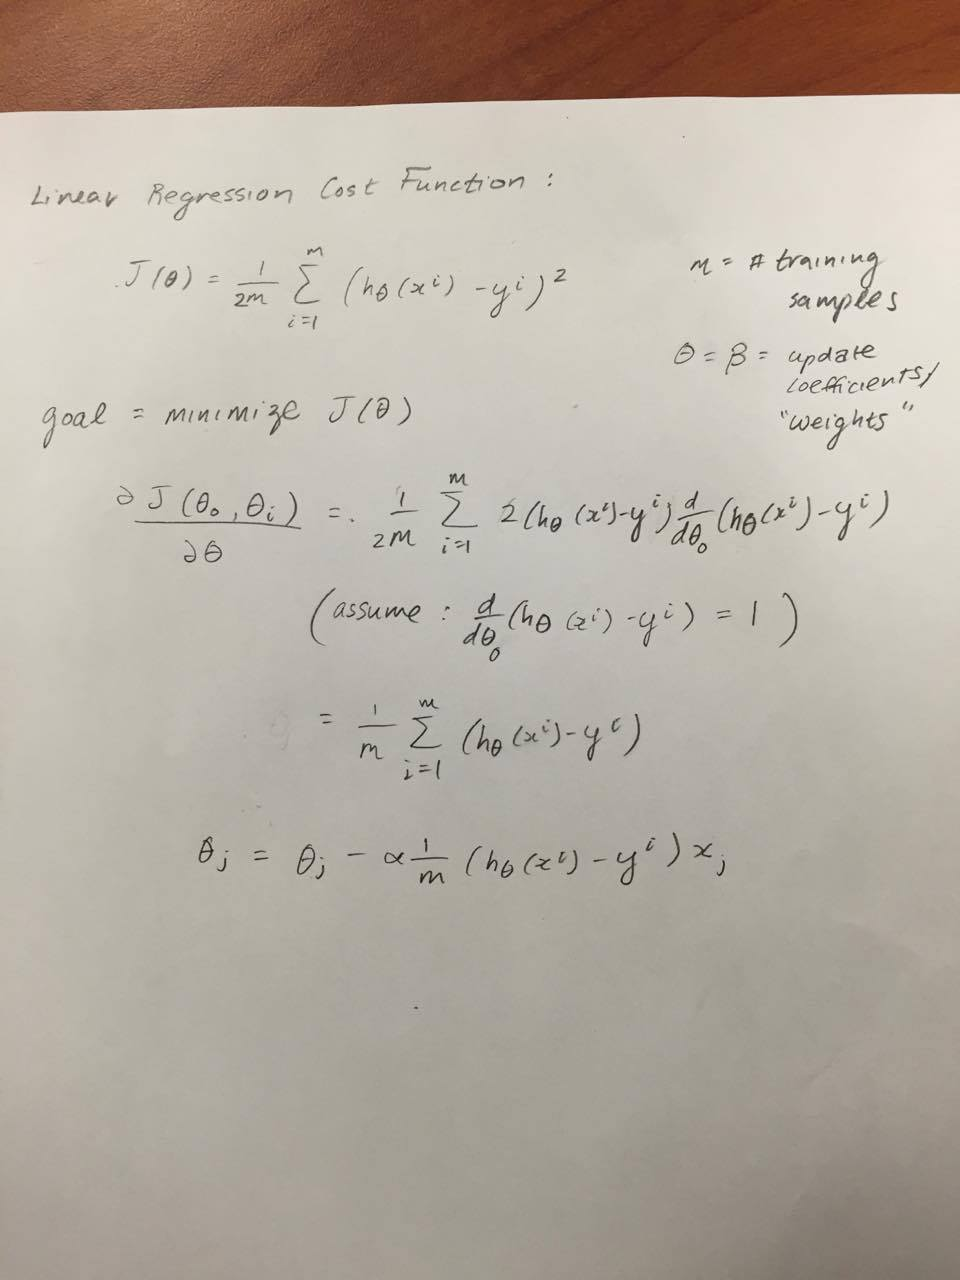

In [1]:
from IPython.display import Image
Image("q4_1.png")

##### 4.2
Write Python code for a gradient descent version of linear regression. Should be similar to sklearn in that you have a fit function that takes an X, y, learning rate, and number of iterations and a predict funtion that takes an X value. Use your new SGD regression to re-run question 2.4 and compare MSE. Make sure you always normalize your X matrices and use an intercept. You can also compare your results with SGDRegressor from sklearn, but not required.

In [184]:
class GradientDescent:   
    def __init__(self, fit_intercept=True, normalize=True, copy_X=True, n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
        
    def fit(self, X, y, alpha, n_iters):
        m, n = np.shape(X)
        theta = np.ones(n)
        xTrans = X.transpose()
        for i in range(0, n_iters):
            hypothesis = np.dot(X, theta)
            loss = hypothesis - y
            # avg cost per example (the 2 in 2*m doesn't really matter here.
            # But to be consistent with the gradient, I include it)
            cost = np.sum(loss ** 2) / (2 * samples)
            #print("Iteration %d | Cost: %f" % (i, cost))
            # avg gradient per example
            gradient = np.dot(X.T, loss) / samples
            # update
            theta = theta - alpha * gradient
        return theta
    
#    def predict(self, X)
#        scores = self.decision_function(X)
#        if len(scores.shape) == 1:
#            indices = (scores > 0).astype(np.int)
#        else:
#            indices = scores.argmax(axis=1)
#        return self.classes_[indices]

sgd = GradientDescent()
row_sums = X_train.sum(axis=1)
new_matrix = X_train / row_sums[:, np.newaxis]
alpha = 0.1
n_iters=1500
coefs = sgd.fit(new_matrix, y_train, alpha, n_iters)
print "Coefficients using the stochastic gradient descent: "
for coef in coefs:
    print coef
#error = metrics.mean_squared_error(y_test, sgd.predict(X_test))

Coefficients using the stochastic gradient descent: 
0.950527901931
1.0264204558
1.81323780471
3.49202725963
2.02906951899


## Question 5 (2+1+5+2 = 10 points)

We will use Google's Tensorflow to create a simple multi-layered perceptron. Installation instructions can be found [here](https://www.tensorflow.org/versions/r0.7/get_started/os_setup.html#pip-installation). To make our lives even easier, we will be using [skflow](https://github.com/tensorflow/skflow). This can be installed via pip install skflow. This is a higher level API on top of tensorflow. You can find documentation on how to get started on the skflow page.

To install tensorflow, this command should work (did on Mac):

sudo pip install --upgrade https://storage.googleapis.com/tensorflow/mac/tensorflow-0.7.0-py2-none-any.whl --ignore-installed

1. Use pandas to get spam classification [data](https://archive.ics.uci.edu/ml/datasets/Spambase) from UCI. Don't worry about getting the column names. The last column is a 1 if spam, zero otherwise.
2. Split the data into training and testing using test_size=0.33, random_state=42.
3. Use a TensorFlowDNNClassifier to classify whether an email is spam and report your testing accuracy. You should use 1 hidden layer with 5 units, 50,000 steps, and a learning rate of .05. What does each parameter do and why does it matter?
4. Compare your accuracy to a logistic regression using sklean. Discuss why one may have performed better than the other. You may also experiment with the architecture of your neural network (i.e. the number of hidden units, the number of nodes, the number of steps, and the learning rate) to see if you can improve your results from part 3.

##### 5.1

In [185]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data", sep = ',', 
                   header = None)
spam = data[57]
del data[57]

##### 5.2

In [186]:
from sklearn.cross_validation import train_test_split
data_training, data_testing, spam_training, spam_testing = train_test_split(data, spam, 
                                                                            test_size = 0.33, random_state = 42)

##### 5.3    1 hidden layer, 5 units, 50000 steps, learning rate of .05

In [1]:
import skflow
from sklearn import datasets, metrics, linear_model

classifier = skflow.TensorFlowDNNClassifier(hidden_units = [5], n_classes = 2, steps = 50000, learning_rate = 0.05)
classifier.fit(data_training, spam_training)
score = metrics.accuracy_score(classifier.predict(data_testing), spam_testing)
print("Accuracy: %f" % score)

ImportError: No module named tensorflow

##### n_classes represents how many classes we are trying to predict. In this question, they are 'spam' and 'not spam'. Steps are how many time this software is going to run.

##### 5.4

In [187]:
regr = model.LogisticRegression()
regr.fit(data_training, spam_training)
regr_predict = regr.predict(data_testing)
score = metrics.accuracy_score(regr_predict, spam_testing)
print("Accuracy: %f" % score)

Accuracy: 0.930876


###### The accuracy we got from logistic regression is way higher than the classifier, the reason of this could be not enough step of classifier.  If we let it runs for days, this accuracy could be much better

## Question 6 (2+2+3 = 7 points)

1. State briefly what you understand by the bias-variance tradeoff.

2. For a given model and problem, what happens to these two quantities when the amount of training data available decreases, keeping all other factors remaining the same ( e.g. if 5-fold CV was used to train the original model, the same is used for the smaller dataset)?

3. Suppose you want to approximate the pdf of a continuous random variable $X$, that takes on values over the interval (a,b), as follows: Get $N$ i.i.d samples of $X$; bin the interval into $k$ equi-spaced bins, and construct a histogram, which you then normalize so that total area under the histogram is 1. This normalized histogram will be an approximation of the true pdf. Clearly the histogram will change if you repeat this experiment using another $N$ samples; hence you can consider the quality of the solution in term of the 'mean' histogram (bias) and the variations among the histograms (variance).  Qualitatively explain how you would expect the bias-variance tradeoff to be reflected in this situation, as a function of $k$.

##### 6.1
It is the problem of stimultaneously minizing two sources of erro that prevent supervised learning from generalizing from their traing training sets.  Bias is the error from errorneous assumptions in the learing algorithm.  And variance is error from sensitivity to small fluctuation in the training set.

##### 6.2
If we reduce the sample size, the bias would decrease, but in the other hand, we also increased the source of variance.

##### 6.3
Since $|\hat{p}(x) - p(x)| = |\hat{p}(x) - E[\hat{p}(x)] + E[\hat{p}(x)] - p[x]|$, which variance is $\hat{p}(x) - E[\hat{p}(x)]$ and bias is $E[\hat{p}(x)] - p[x]$.  If bin-width is $\delta$, the number of bins $k$ would be $1/\delta$.  Then if the $\delta$ is small and $k$ is large, it will result in small bias and large variance, if $\delta$ is large and $k$ is small, it will result in large bias and small variance. 